## Data Science Tutorial: Time Series Analysis with Oil Price Data in Python

In recent years, inflation has accelerated in the United States. In particular, the price of crude oil has skyrocketed due to the war, and many people are anxious about the future course of the oil market. This article will explain the basics of how to analyze time series data using crude oil price data.

Throughout this article you will learn

1. the basics of how to analyze time-series data.

2. how crude oil prices have been changing

Reference :

Koki Noda, https://medium.com/mlearning-ai/data-science-basics-time-series-analysis-with-oil-price-data-in-python-6f0b58321659

In [89]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [90]:
data_dir = "./data/oil_price_analysis"
os.makedirs(data_dir, exist_ok=True)

**Crude Oil Prices: West Texas Intermediate (WTI) — Cushing, Oklahoma (DCOILWTICO)**\
WTI is one of the leading oil price indices due to the large volume of transactions and market participants. We will download the data for the entire period available and use it for analysis.

Reference:

U.S. Energy Information Administration, Crude Oil Prices: West Texas Intermediate (WTI) — Cushing, Oklahoma [DCOILWTICO], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DCOILWTICO, May 20, 2022.

In [91]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime.today()
wti_oil_price = web.DataReader('DCOILWTICO', 'fred', start, end)
# save the data
file_path = f"{data_dir}/DCOILWTICO.csv"
wti_oil_price.to_csv(file_path)
wti_oil_price

,DCOILWTICO
DATE,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2022-05-25,112.88
2022-05-26,116.19
2022-05-27,114.96


When dealing with time series data, it is important to handle time information. Time information is often set to an index. In the following code, time information is set to the index when reading a csv file.

In [92]:
wti_oil_price = pd.read_csv(file_path, index_col="DATE", parse_dates=True)
print(wti_oil_price.shape)
wti_oil_price.tail(3)
wti_oil_price

(9499, 1)


,DCOILWTICO
DATE,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2022-05-25,112.88
2022-05-26,116.19
2022-05-27,114.96


We will draw a time-series plot to see how oil price have changed.

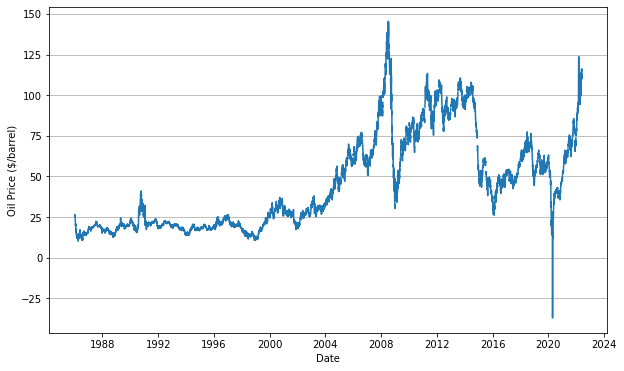

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(wti_oil_price)
plt.grid(axis="y")
plt.ylabel("Oil Price ($/barrel)")
plt.xlabel("Date")
plt.show()

**Data Extraction with Datetime Index**\
Since time information is set to an index, it is easy to extract data by specifying the time. There are several ways to extract time-specified data, one of which is to specify the time in the form of a string.

Let’s extract data for April 20, when the oil price was negative.

In [94]:
wti_oil_price.loc['2020-04-20']

DCOILWTICO   -36.98
Name: 2020-04-20 00:00:00, dtype: float64

A colon can be used to specify a range of time.

In [95]:
wti_oil_price.loc['2020-04-20':'2020-04-30']

,DCOILWTICO
DATE,
2020-04-20,-36.98
2020-04-21,8.91
2020-04-22,13.64
2020-04-23,15.06
2020-04-24,15.99
2020-04-27,12.17
2020-04-28,12.40
2020-04-29,15.04
2020-04-30,19.23


You can also specify the data in Datetime format.

In [96]:
wti_oil_price.loc[dt.datetime(2020, 4, 20)]

DCOILWTICO   -36.98
Name: 2020-04-20 00:00:00, dtype: float64

You can also specify the month or year.

In [97]:
wti_oil_price.loc['2020-04']
wti_oil_price.loc['2020']

,DCOILWTICO
DATE,
2020-01-01,NaN
2020-01-02,61.17
2020-01-03,63.00
2020-01-06,63.27
2020-01-07,62.70
...,...
2020-12-25,NaN
2020-12-28,47.50
2020-12-29,47.85


**Crude Oil Prices: Brent — Europe (DCOILBRENTEU)**\
Another commonly used crude oil price indicator is the Brent crude oil price. In the following, we will use this data where the price is not negative. We will download the data for the entire period available and use it for analysis.

Reference:

U.S. Energy Information Administration, Crude Oil Prices: Brent — Europe [DCOILBRENTEU], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DCOILBRENTEU, May 20, 2022.

In [98]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime.today()
brent_oil_price = web.DataReader('DCOILBRENTEU', 'fred', start, end)
# save the data
file_path = f"{data_dir}/DCOILBRENTEU.csv"
brent_oil_price.to_csv(file_path)
brent_oil_price = pd.read_csv(file_path, index_col="DATE", parse_dates=True)
print(brent_oil_price.shape)
brent_oil_price.tail(3)
brent_oil_price

(9140, 1)


,DCOILBRENTEU
DATE,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-05-25,116.41
2022-05-26,119.81
2022-05-27,121.19


Let us illustrate the transition of crude oil prices again.

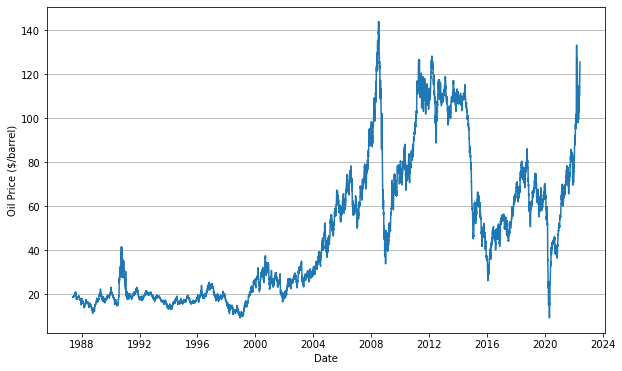

In [99]:
brent_oil_price = brent_oil_price.dropna()

plt.figure(figsize=(10, 6))
plt.plot(brent_oil_price)
plt.grid(axis="y")
plt.ylabel("Oil Price ($/barrel)")
plt.xlabel("Date")
plt.show()

In [100]:
monthly_data_list = []
year_list = brent_oil_price.index.year.unique()
month_list = sorted(brent_oil_price.index.month.unique())

for year in year_list:
    for month in month_list:
        last_day_data = brent_oil_price[(brent_oil_price.index.year == year) &
                               (brent_oil_price.index.month == month)].tail(1)
        monthly_data_list.append(last_day_data)
brent_oil_price_monthly = pd.concat(monthly_data_list)
brent_oil_price_monthly.index = pd.to_datetime(
    brent_oil_price_monthly.index.strftime("%Y-%m"))  # reset index to YYYY-01-01
brent_oil_price_monthly.tail()

,DCOILBRENTEU
DATE,
2022-01-01,92.35
2022-02-01,103.08
2022-03-01,107.29
2022-04-01,108.36
2022-05-01,125.53


Draw a graph to confirm that although the number of data has decreased significantly, the trend of the time-series data has not changed.

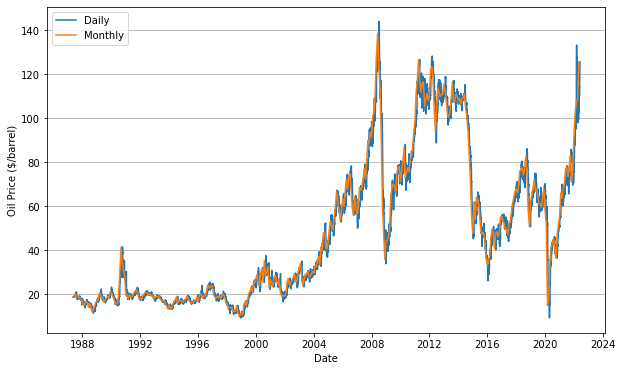

In [101]:
plt.figure(figsize=(10,6))
plt.plot(brent_oil_price, label= "Daily")
plt.plot(brent_oil_price_monthly, label = "Monthly")
plt.grid(axis="y")
plt.ylabel("Oil Price ($/barrel)")
plt.xlabel("Date")
plt.legend(loc = "upper left")
plt.show()

**Moving Average**\
Moving averages are also useful for capturing broad trends. Moving averages calculate the average of the n most recent data, rather than the average of all data. By moving the window in which the average is calculated, the time-series data can be smoothed out.

Moving averages can be calculated using the pandas rolling method.

Here we will calculate and plot the 50-day and 200-day moving averages.

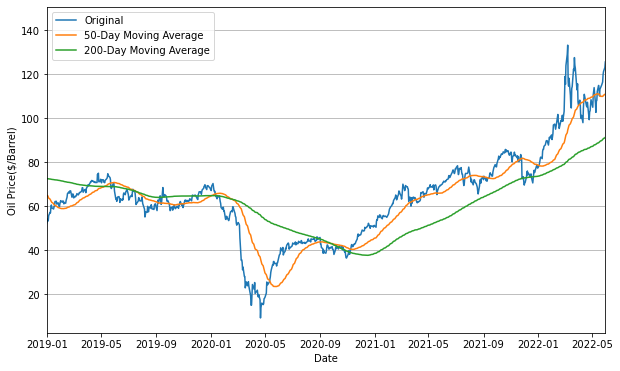

In [102]:
# moving average
brent_oil_price_moving_average_50 = brent_oil_price.rolling(50).mean()
brent_oil_price_moving_average_200 = brent_oil_price.rolling(200).mean()

plt.figure(figsize=(10,6))
plt.plot(brent_oil_price, label="Original")
plt.plot(brent_oil_price_moving_average_50, label="50-Day Moving Average")
plt.plot(brent_oil_price_moving_average_200, label="200-Day Moving Average")
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price($/Barrel)")
plt.legend(loc="upper left")
plt.xlim((dt.datetime(2019, 1, 1), max(brent_oil_price.index)))
plt.show()

Excellent! You can see that the fluctuations that were so drastic in the daily data are now smoothing out.

**Differencing**\
Differencing is often useful with time series data. This is because differencing can have tractable properties such as stationarity. Let’s actually take the difference and see how the data changes.

The calculation itself can be easily done using the shift method of pandas. In this example, we will calculate the difference from the value one month ago.

In [103]:
brent_oil_price_diff = brent_oil_price_monthly - brent_oil_price_monthly.shift()
brent_oil_price_diff.head()

,DCOILBRENTEU
DATE,
1987-05-01,NaN
1987-06-01,0.50
1987-07-01,0.95
1987-08-01,-1.40
1987-09-01,-0.15


The same can be done using the diff method of pandas.

In [104]:
brent_oil_price_monthly.diff().head()

,DCOILBRENTEU
DATE,
1987-05-01,NaN
1987-06-01,0.50
1987-07-01,0.95
1987-08-01,-1.40
1987-09-01,-0.15


Now let’s plot the difference.

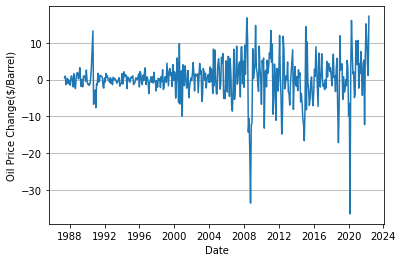

In [105]:
plt.plot(brent_oil_price_diff)
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price Change($/Barrel)")
plt.show()

You can see that the data fluctuates up and down around 0. The original series fluctuated irregularly, but after the difference is taken, the fluctuation is relatively clear.

Let’s check the histogram to see if the data is actually distributed around 0.

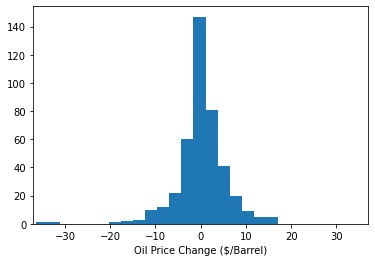

In [106]:
plt.hist(brent_oil_price_diff, bins=20, )
plt.xlabel("Oil Price Change ($/Barrel)")
plt.xlim(-37, 37)
plt.show()

It is amazing! The data is distributed around 0, and it has a beautiful mountain shape.

Also, in time series analysis, logarithmic differences are often taken. The logarithmic difference is an approximate measure of the “rate of change”. Logarithmic also has the advantage of making it easier to fit the data to the model.

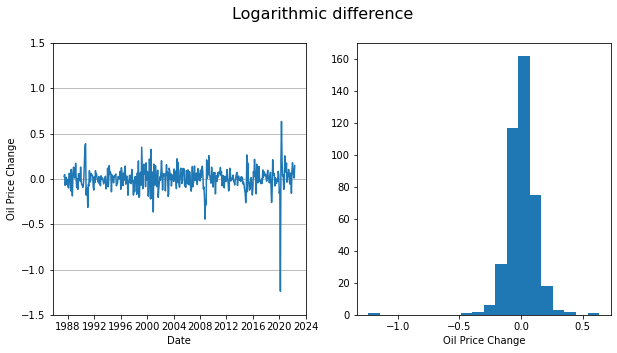

In [107]:
brent_oil_price_logdiff = np.log(brent_oil_price_monthly) - np.log(brent_oil_price_monthly.shift())

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].plot(brent_oil_price_logdiff.dropna())
axes[0].grid(axis="y")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Oil Price Change")
axes[0].set_ylim(-1.5, 1.5)
axes[1].hist(brent_oil_price_logdiff.dropna(), bins=20)
axes[1].set_xlabel("Oil Price Change")
#axes[1].set_xlim(-1.5, 1.5)

fig.suptitle('Logarithmic difference', fontsize=16)
plt.show()

**Autocorrelation**

*The main feature of time series data is that they are autocorrelated*: since time series data are obtained by following the same variables over time, *data that are close in time tend to have similar values.*

For example, a positive autocorrelation indicates that if the price of crude oil was high yesterday, it will be high today as well. A negative autocorrelation would indicate the opposite.

However, autocorrelation alone can be somewhat difficult to interpret. This is because there is a possibility that the effect of indirect autocorrelation is included. For example, if yesterday and today are similar and the day before yesterday and yesterday are similar, are the day before yesterday and today similar or not so similar? It is a little difficult to tell.

In such cases, *partial autocorrelation* is effective. Partial autocorrelation allows us to calculate the autocorrelation only for a specific day, ignoring other days.

Using statsmodels, we can calculate autocorrelation and partial autocorrelation as follows

In [108]:
# autocorrelation
acf = sm.tsa.stattools.acf(brent_oil_price_monthly, nlags=20)
acf
# partial autocorrelation
pacf = sm.tsa.stattools.pacf(brent_oil_price_monthly, nlags=20, method='ols')
pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  9.91116945e-01, -2.53578373e-01,  2.75420168e-02,
        8.64353122e-03,  4.66532791e-02,  2.92837159e-02,  3.56487423e-02,
        2.43842818e-02,  1.32466371e-02,  2.61230616e-02, -1.62658677e-02,
       -7.76578238e-02,  4.04428855e-02,  4.84026076e-02,  3.90756507e-02,
       -6.34869325e-02, -1.84794553e-02,  2.81281697e-02,  2.22343277e-02,
       -1.84254761e-04])

Let’s graph autocorrelation. The horizontal axis shows the lag and the vertical axis shows the value of the autocorrelation. This graph is called a *correlogram*.

Text(0.5, 0.98, 'Correlation on Monthly data')

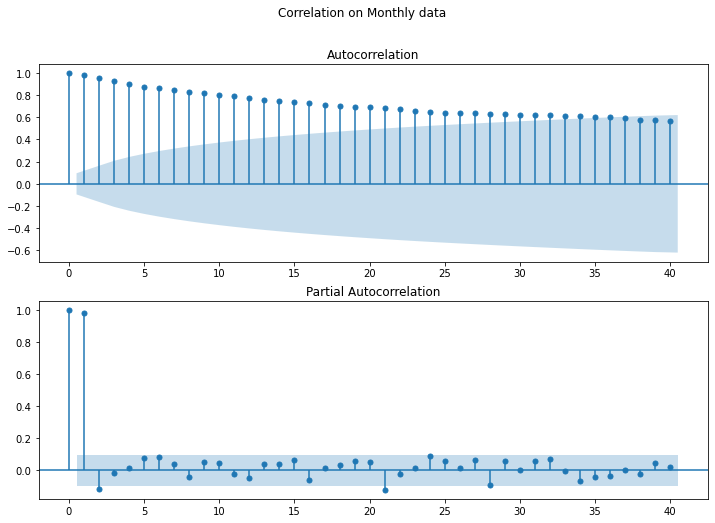

In [109]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(brent_oil_price_monthly, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(brent_oil_price_monthly, lags=40, ax=ax2)
fig.suptitle("Correlation on Monthly data")

*Autocorrelation and Partial Autocorrelation*\
The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF) For example the ACF for a time series yt is given by:

$$Corr(y_{t},y_{t−k}),k=1,2,....$$
This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., $k = 1$ in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. If we assume an AR(k) model, then we may wish to only measure the association between $y_{t}$ and $y_{t−k}$ and filter out the linear influence of the random variables that lie in between (i.e., $y_{t−1},y_{t−2,}…,y_{t−(k−1)}$), which requires a transformation on the time series. Then by calculating the correlation of the transformed time series we obtain the partial autocorrelation function (PACF).

The PACF is most useful for identifying the order of an autoregressive model. Specifically, sample partial autocorrelations that are significantly different from 0 indicate lagged terms of $y$ that are useful predictors of $y_{t}$. It is important that the choice of the order makes sense. For example, suppose you have blood pressure readings for every day over the past two years. You may find that an AR(1) or AR(2) model is appropriate for modeling blood pressure. However, the PACF may indicate a large partial autocorrelation value at a lag of 17, but such a large order for an autoregressive model likely does not make much sense.

Reference:

The Pennsylvania State University - Applied Regression Analysis, 10.2 - Autocorrelation and Time Series Methods, https://online.stat.psu.edu/stat462/node/188/#:~:text=A%20lag%201%20autocorrelation%20(i.e.,are%20k%20time%20periods%20apart.

The area shaded in blue shows the 95% confidence interval for the null hypothesis that the autocorrelation is zero. If there are points outside this interval, we can say that there is significant autocorrelation.

In the oil price data, we see that the autocorrelation is very strong. On the other hand, when we look at partial autocorrelation, we find that the correlation with the values of one or two months ago is large, while there is almost no correlation with the other values.

Finally, we will draw a correlogram for the difference series.

Text(0.5, 0.98, 'Correlation on Logarithmic difference')

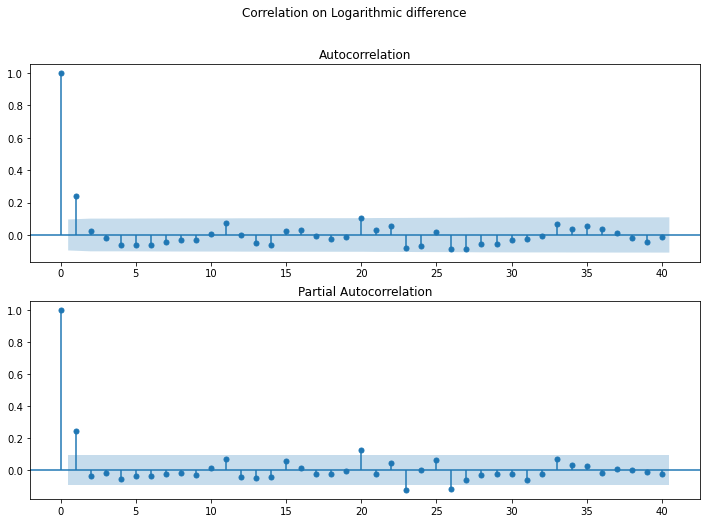

In [110]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(brent_oil_price_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(brent_oil_price_diff.dropna(), lags=40, ax=ax2)
fig.suptitle("Correlation on Logarithmic difference")

The autocorrelations are much smaller, with only first-order autocorrelations.

## Conclusion
In this article, we looked in detail at the handling of time series data and the characteristics of the data. I recommend that you try to study them while actually writing the code.
I will write another article on time series data modeling. Please follow me to make sure you don’t miss it.